# 영화 리뷰 분류: 이진 분류 예제
### 리뷰 50,000개
### 훈련 데이터 25,000개와 테스트 데이터 25,000개
### 50%는 부정, 50%는 긍정 리뷰

In [1]:

import keras
import pandas as pd
keras.__version__

'2.8.0'

In [2]:

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [6]:
type(train_data)

numpy.ndarray

In [7]:
type(train_data)

numpy.ndarray

In [8]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns=['train_data']
movie_df['train_labels'] = train_labels_df
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [9]:
movie_df.shape

(25000, 2)

In [10]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [11]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [12]:
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [13]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [14]:
movie_df['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [15]:
movie_df.loc[:]['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [16]:
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [17]:
train_labels[0]

1

In [18]:
max([max(sequence) for sequence in train_data])

9999

In [19]:
len(train_labels)

25000

In [20]:
len([max(sequence) for sequence in train_data])

25000

In [21]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [22]:
train_data[17]

[1,
 33,
 4,
 5673,
 7,
 4,
 2,
 194,
 2,
 3089,
 3438,
 11,
 4131,
 1237,
 2,
 2,
 5,
 4,
 522,
 2,
 2,
 13,
 8474,
 23,
 35,
 3077,
 9731,
 148,
 2,
 503,
 503,
 758,
 451,
 37,
 5535,
 4,
 123,
 103,
 153,
 7,
 6397,
 2,
 2,
 8021,
 141,
 17,
 2,
 2,
 2,
 2,
 2,
 13,
 197,
 36,
 71,
 112,
 2,
 5,
 301,
 38,
 2,
 2808,
 320,
 893,
 2,
 16,
 95,
 1376,
 83,
 4,
 3743,
 19,
 49,
 7197,
 46,
 12,
 69,
 2684,
 35,
 631,
 284,
 2,
 56,
 73,
 422,
 21,
 488,
 6239,
 69,
 1452,
 11,
 2853,
 17,
 6,
 430,
 5,
 4597,
 2,
 2,
 4,
 3769,
 2,
 4909,
 4,
 635,
 29,
 839,
 8,
 27,
 239,
 17,
 2,
 2,
 2,
 4,
 3212,
 1395,
 109,
 284,
 2,
 2,
 301,
 11,
 6,
 5125,
 664,
 2,
 2,
 4,
 2,
 15,
 29,
 16,
 3072,
 54,
 29,
 557,
 6239,
 69,
 5955,
 4,
 217,
 21,
 1283,
 57,
 1395,
 284,
 100,
 28,
 256,
 15,
 217,
 17,
 73,
 17,
 6239,
 849,
 10,
 10,
 2,
 16,
 4050,
 5,
 2,
 4236,
 123,
 8,
 2,
 2,
 82,
 270,
 11,
 7627,
 4,
 2,
 631,
 513,
 7,
 2,
 23,
 2019,
 69,
 77,
 2959,
 34,
 4,
 893,
 9147,
 2,
 

In [23]:
for i in train_data[17]:
    print(i)

1
33
4
5673
7
4
2
194
2
3089
3438
11
4131
1237
2
2
5
4
522
2
2
13
8474
23
35
3077
9731
148
2
503
503
758
451
37
5535
4
123
103
153
7
6397
2
2
8021
141
17
2
2
2
2
2
13
197
36
71
112
2
5
301
38
2
2808
320
893
2
16
95
1376
83
4
3743
19
49
7197
46
12
69
2684
35
631
284
2
56
73
422
21
488
6239
69
1452
11
2853
17
6
430
5
4597
2
2
4
3769
2
4909
4
635
29
839
8
27
239
17
2
2
2
4
3212
1395
109
284
2
2
301
11
6
5125
664
2
2
4
2
15
29
16
3072
54
29
557
6239
69
5955
4
217
21
1283
57
1395
284
100
28
256
15
217
17
73
17
6239
849
10
10
2
16
4050
5
2
4236
123
8
2
2
82
270
11
7627
4
2
631
513
7
2
23
2019
69
77
2959
34
4
893
9147
2
7
2853
11
572
6
273
446
2
121
35
1272
3252
1073
1457
23
287
18
4
4750
793
98
2
2
742
2
27
86
2900
217
237
2
11
2
1250
2
2
2
6597
7348
2
2
2
2
2
852
2
2
5187
308
2
5
2
2
4
522
1368
3717
2
120
14
1366
7
2
16
4
2
6313
678
1701
4
530
2
3770
37
5416
98
32
17
2
27
4185
33
24
112
502
8
485
27
349
56
4
2687
8
4526
4
2543
11
4000
93
90
2919
5
9935
151
29
16
327
8
2
937
29
197
16
27
2
4

In [24]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [26]:
sorted(reverse_word_index.items())


[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [27]:
len(reverse_word_index)

88584

In [28]:
sorted(reverse_word_index)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [29]:
train_data[17]

[1,
 33,
 4,
 5673,
 7,
 4,
 2,
 194,
 2,
 3089,
 3438,
 11,
 4131,
 1237,
 2,
 2,
 5,
 4,
 522,
 2,
 2,
 13,
 8474,
 23,
 35,
 3077,
 9731,
 148,
 2,
 503,
 503,
 758,
 451,
 37,
 5535,
 4,
 123,
 103,
 153,
 7,
 6397,
 2,
 2,
 8021,
 141,
 17,
 2,
 2,
 2,
 2,
 2,
 13,
 197,
 36,
 71,
 112,
 2,
 5,
 301,
 38,
 2,
 2808,
 320,
 893,
 2,
 16,
 95,
 1376,
 83,
 4,
 3743,
 19,
 49,
 7197,
 46,
 12,
 69,
 2684,
 35,
 631,
 284,
 2,
 56,
 73,
 422,
 21,
 488,
 6239,
 69,
 1452,
 11,
 2853,
 17,
 6,
 430,
 5,
 4597,
 2,
 2,
 4,
 3769,
 2,
 4909,
 4,
 635,
 29,
 839,
 8,
 27,
 239,
 17,
 2,
 2,
 2,
 4,
 3212,
 1395,
 109,
 284,
 2,
 2,
 301,
 11,
 6,
 5125,
 664,
 2,
 2,
 4,
 2,
 15,
 29,
 16,
 3072,
 54,
 29,
 557,
 6239,
 69,
 5955,
 4,
 217,
 21,
 1283,
 57,
 1395,
 284,
 100,
 28,
 256,
 15,
 217,
 17,
 73,
 17,
 6239,
 849,
 10,
 10,
 2,
 16,
 4050,
 5,
 2,
 4236,
 123,
 8,
 2,
 2,
 82,
 270,
 11,
 7627,
 4,
 2,
 631,
 513,
 7,
 2,
 23,
 2019,
 69,
 77,
 2959,
 34,
 4,
 893,
 9147,
 2,
 

In [30]:
reverse_word_index[30],reverse_word_index[1], reverse_word_index[5670]

('at', 'the', 'height')

In [31]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[17]])
decoded_review

"? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ?

In [32]:
reverse_word_index = sorted(reverse_word_index.items())[0:9999]
reverse_word_index

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


## 데이터 준비

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    print(type(sequences))
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        print()
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data).astype('float32')
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data).astype('float32')



<class 'numpy.ndarray'>


















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































<class 'numpy.ndarray'>


















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [34]:
type(train_data)

numpy.ndarray

In [35]:
import numpy as np
#[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...	
def vectorize_sequences(sequences, dimension=10000):
    print(len(sequences))
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        print()
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data).astype('float32')
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data).astype('float32')

x_train[0]

25000




































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [36]:
# test case
sequence = [1, 3]
results = np.zeros((3, 5))
results[0, sequence] = 1.

results[0]

array([0., 1., 0., 1., 0.])

In [37]:
# test case
x_train[0][0], x_train[0][1], x_train[0][3], x_train[0][14]

(0.0, 1.0, 0.0, 1.0)

In [38]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [39]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [40]:
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [41]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## 신경망 모델 만들기
![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [44]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
from keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 훈련 검증

In [48]:
x_val = x_train[:10000].astype(float)
partial_x_train = x_train[10000:].astype(float)

y_val = y_train[:10000].astype(float)
partial_y_train = y_train[10000:].astype(float)

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 161ms/step - loss: 0.5324 - binary_accuracy: 0.7762 - val_loss: 0.4323 - val_binary_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3251 - binary_accuracy: 0.9017 - val_loss: 0.3198 - val_binary_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2353 - binary_accuracy: 0.9261 - val_loss: 0.2872 - val_binary_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1835 - binary_accuracy: 0.9405 - val_loss: 0.2817 - val_binary_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1465 - binary_accuracy: 0.9531 - val_loss: 0.2795 - val_binary_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1195 - binary_accuracy: 0.9627 - val_loss: 0.2929 - val_binary_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - lo

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

In [51]:
import matplotlib.pyplot as plt

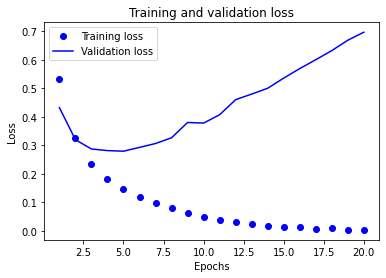

In [52]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

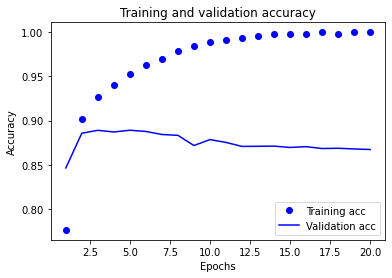

In [53]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [56]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 2s 19ms/step - loss: 0.4568 - accuracy: 0.8250
Epoch 2/10
49/49 [==============================] - 1s 17ms/step - loss: 0.2627 - accuracy: 0.9102
Epoch 3/10
49/49 [==============================] - 1s 18ms/step - loss: 0.2024 - accuracy: 0.9298
Epoch 4/10
49/49 [==============================] - 1s 17ms/step - loss: 0.1700 - accuracy: 0.9400
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.1469 - accuracy: 0.9490
Epoch 6/10
49/49 [==============================] - 1s 17ms/step - loss: 0.1283 - accuracy: 0.9557
Epoch 7/10
49/49 [==============================] - 1s 17ms/step - loss: 0.1127 - accuracy: 0.9620
Epoch 8/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0998 - accuracy: 0.9672
Epoch 9/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0885 - accuracy: 0.9704
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.4249 - accuracy: 0.8654


In [57]:
model.predict(x_test)

array([[0.11058778],
       [0.99994063],
       [0.8939533 ],
       ...,
       [0.17631686],
       [0.02940592],
       [0.90241575]], dtype=float32)

In [58]:
model.predict(x_train)

array([[9.9697798e-01],
       [1.5696883e-04],
       [1.7598722e-05],
       ...,
       [5.0099492e-03],
       [9.9714774e-01],
       [5.7849944e-02]], dtype=float32)